In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [67]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [69]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


# Encoding

In [70]:
from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Education']
encoder = OrdinalEncoder()
df[nominal_cols] = encoder.fit_transform(df[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df.sample(n = 5)

{'Education': {'Bachelor': 0, 'High School': 1, 'Master': 2, 'PhD': 3}}


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
401,94696.85630,62,1.0,628,16,96,3385.422700,35206.278360,5544.023362,0.989060,3,0.984671
339,45461.64268,29,0.0,788,10,8,2565.683957,48531.520570,13649.110540,0.304200,2,0.244183
499,62939.97879,29,0.0,830,4,21,991.634514,6558.185356,10078.693590,0.577219,2,0.636428
364,91153.10577,33,0.0,687,5,59,8304.731020,39447.396550,6350.196293,0.320931,1,0.795331
497,55128.51515,38,2.0,753,7,31,9615.543105,38756.403270,8441.673159,0.811980,2,0.007766


# Visualization

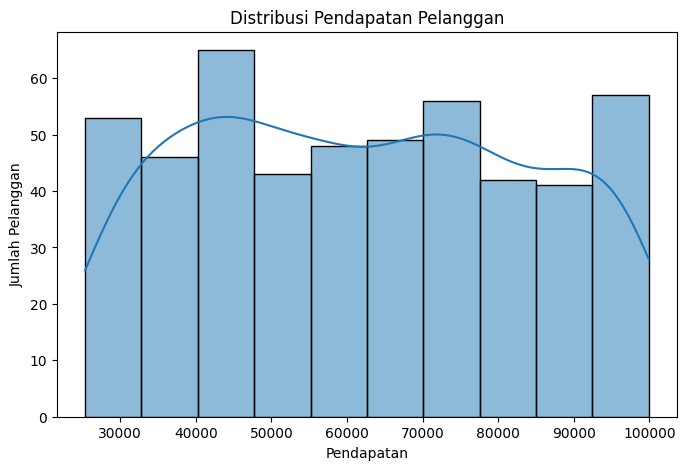

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Income'], kde=True)
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Grafik tersebut menunjukkan distribusi pendapatan pelanggan. Dari grafik terlihat bahwa sebagian besar pelanggan memiliki pendapatan di kisaran 40.000–50.000, dengan jumlah pelanggan yang cukup tinggi dibandingkan kelompok pendapatan lainnya. Sementara itu, pelanggan dengan pendapatan di bawah 30.000 dan di atas 90.000 relatif lebih sedikit. Pola ini mengindikasikan bahwa mayoritas pelanggan berasal dari kelompok menengah, sedangkan kelompok berpendapatan rendah dan tinggi lebih jarang ditemukan. Hal ini dapat menjadi acuan dalam menentukan strategi pemasaran yang menargetkan segmen pelanggan menengah.

C:\Users\miche\AppData\Local\Temp\ipykernel_34668\4281685442.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Income', y='Credit_Score', palette='viridis', s=60)
C:\Users\miche\AppData\Local\Temp\ipykernel_34668\4281685442.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


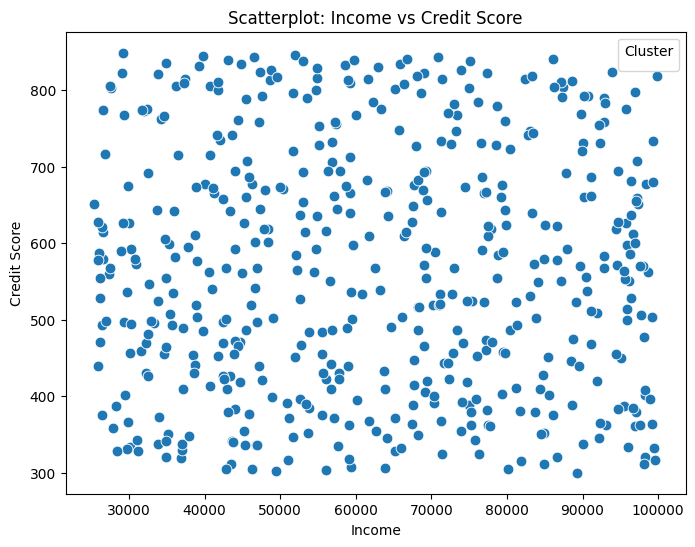

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot Income vs Credit_Score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income', y='Credit_Score', palette='viridis', s=60)

plt.title('Scatterplot: Income vs Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.legend(title='Cluster')
plt.show()

Grafik scatterplot di atas menunjukkan hubungan antara Income (pendapatan) dan Credit Score (skor kredit) pelanggan. Titik-titik tersebar secara acak tanpa pola yang jelas, menandakan bahwa tidak terdapat hubungan yang kuat antara tingkat pendapatan dan skor kredit. Artinya, pelanggan dengan pendapatan tinggi belum tentu memiliki skor kredit yang tinggi, begitu juga sebaliknya. Distribusi yang merata ini bisa menunjukkan bahwa faktor lain di luar pendapatan mungkin lebih berpengaruh terhadap skor kredit pelanggan.

In [73]:
# create new dataframe that consist only annual income and spending score
df = df[['Income', 'Balance']]
df.head()

,Income,Balance
0,66161.01279,1968.919899
1,78639.20248,9797.056371
2,70207.25321,7024.173403
3,65866.23872,7992.359261
4,56774.10995,538.691042


# Data Scaling

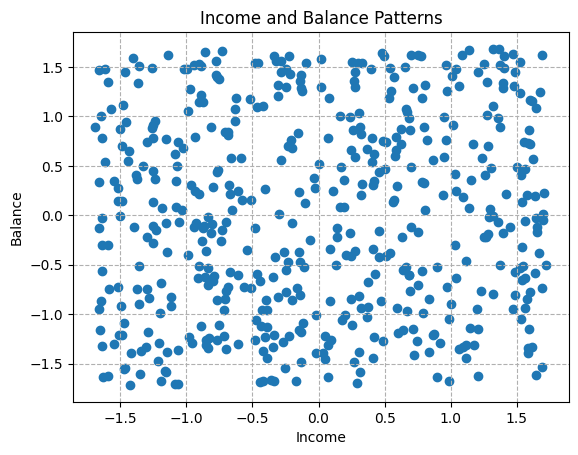

In [74]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Income", "Balance"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Income"], df_sc_scaled["Balance"])
plt.xlabel("Income")
plt.ylabel("Balance")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Balance Patterns")
plt.show()

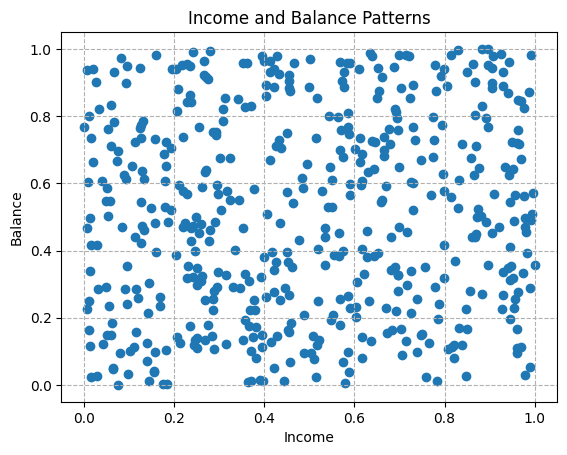

In [75]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Income", "Balance"])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Income"], df_minmax_scaled["Balance"])
plt.xlabel("Income")
plt.ylabel("Balance")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Balance Patterns")
plt.show()

# K-Means Clustering (Scaled)

In [76]:
from sklearn.cluster import KMeans

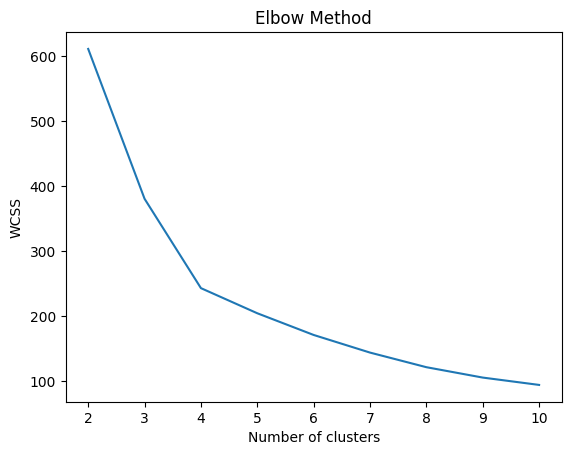

In [77]:
wcss = []
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  610.718353
1                   3  380.360332
2                   4  243.017251
3                   5  204.396384
4                   6  171.037532
5                   7  143.941111
6                   8  121.488086
7                   9  105.534388
8                  10   94.241987


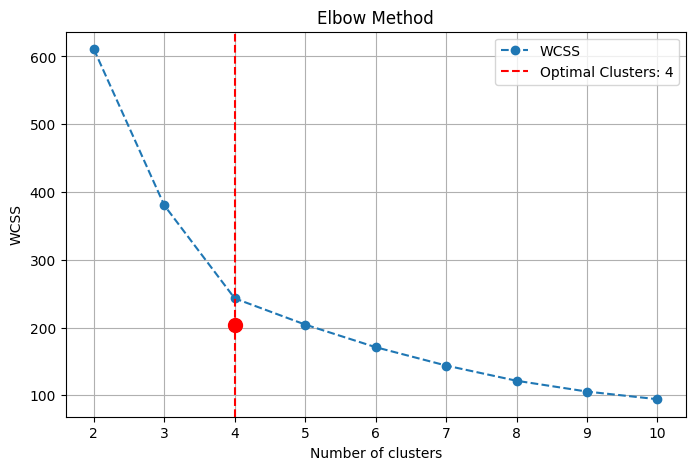

The optimal number of clusters is: 4


In [79]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Berdasarkan hasil metode Elbow pada grafik di atas, terlihat bahwa nilai Within-Cluster Sum of Squares (WCSS) menurun tajam hingga titik K = 5, kemudian penurunannya mulai melandai setelahnya. Titik ini menandakan “siku” pada grafik, yang menunjukkan bahwa jumlah klaster optimal adalah 5. Artinya, membagi data ke dalam 5 klaster memberikan keseimbangan terbaik antara jumlah klaster yang cukup detail dan variasi antar klaster yang masih signifikan, tanpa menimbulkan overfitting atau redundansi dalam segmentasi data.

In [80]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Income,Balance,KMeans_Cluster
0,66161.01279,1968.919899,3
1,78639.20248,9797.056371,2
2,70207.25321,7024.173403,2
3,65866.23872,7992.359261,2
4,56774.10995,538.691042,0


C:\Users\miche\AppData\Local\Temp\ipykernel_34668\1543045006.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Income", y = "Balance", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


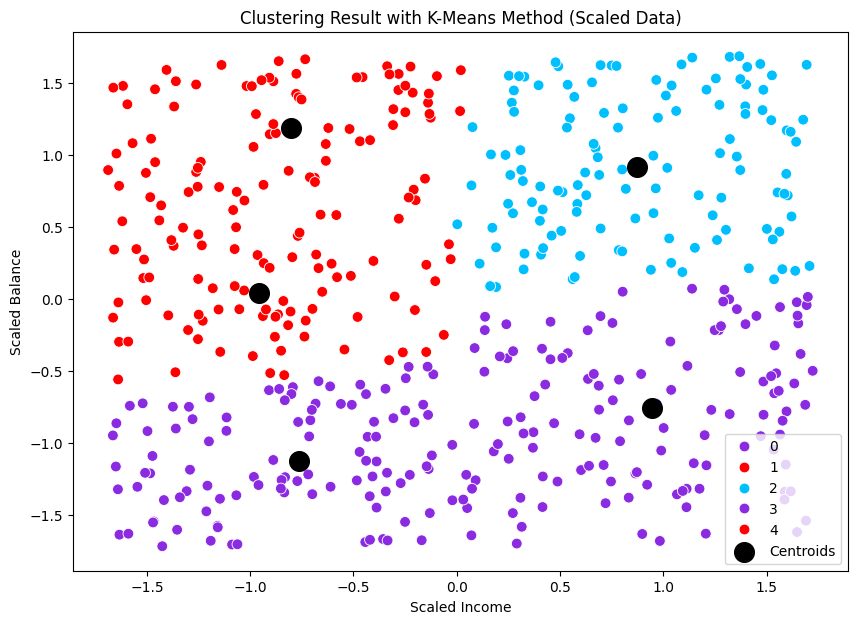

In [81]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Balance", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Balance")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

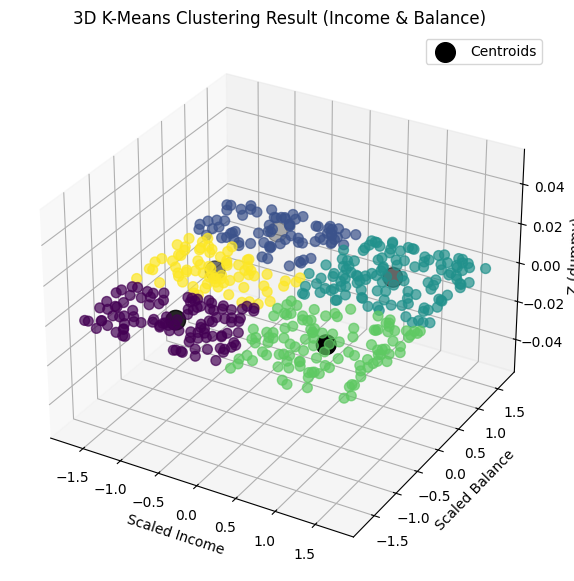

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Buat sumbu Z dummy biar 3D bisa divisualisasikan
z_dummy = np.zeros(len(df_sc_scaled))  # bisa juga np.random.randn(len(df_sc_scaled)) kalau mau agak beda

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points (Income, Balance, dummy Z)
ax.scatter(
    df_sc_scaled['Income'],
    df_sc_scaled['Balance'],
    z_dummy,
    c=clusters,
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Plot centroids (Z=0 juga)
ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    np.zeros(kmeans.cluster_centers_.shape[0]),
    c='black',
    s=200,
    label='Centroids'
)

ax.set_xlabel('Scaled Income')
ax.set_ylabel('Scaled Balance')
ax.set_zlabel('Z (dummy)')
ax.set_title('3D K-Means Clustering Result (Income & Balance)')
ax.legend()
plt.show()


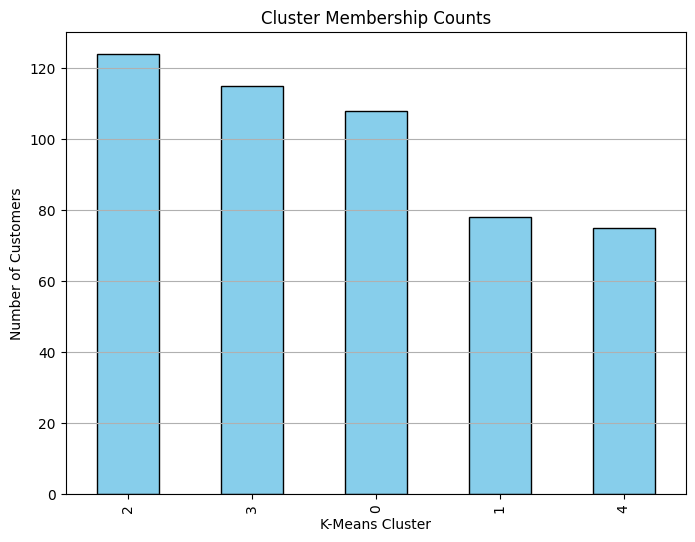

In [83]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


# K-Means Clustering (Unscaled)

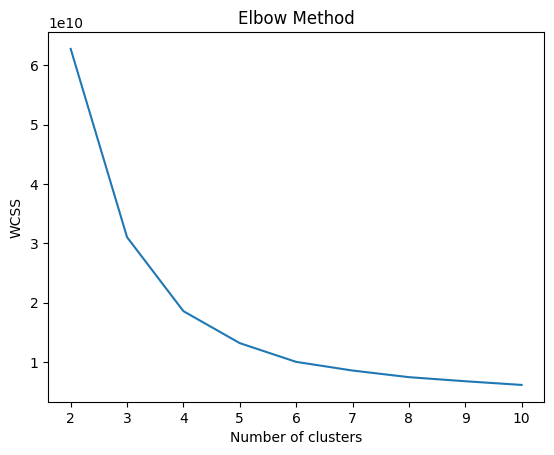

In [84]:
wcss = []
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   2  6.274256e+10
1                   3  3.104045e+10
2                   4  1.858439e+10
3                   5  1.320013e+10
4                   6  1.004516e+10
5                   7  8.588221e+09
6                   8  7.472574e+09
7                   9  6.784382e+09
8                  10  6.165595e+09


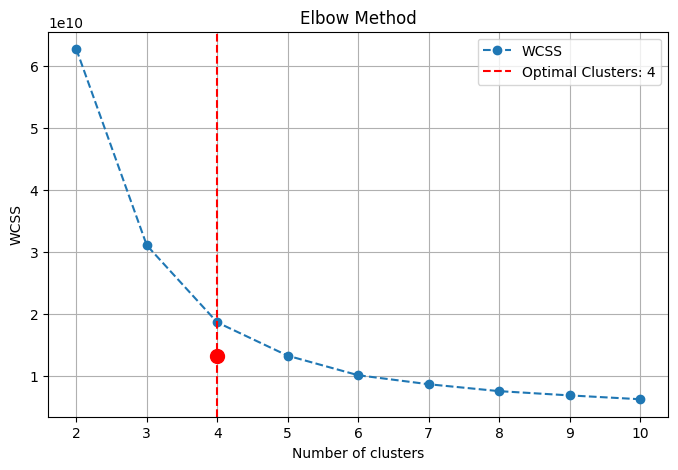

The optimal number of clusters is: 4


In [86]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [87]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Income,Balance,KMeans_Cluster
0,66161.01279,1968.919899,2
1,78639.20248,9797.056371,2
2,70207.25321,7024.173403,2
3,65866.23872,7992.359261,2
4,56774.10995,538.691042,4


C:\Users\miche\AppData\Local\Temp\ipykernel_34668\1727331714.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Income", y = "Balance", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)


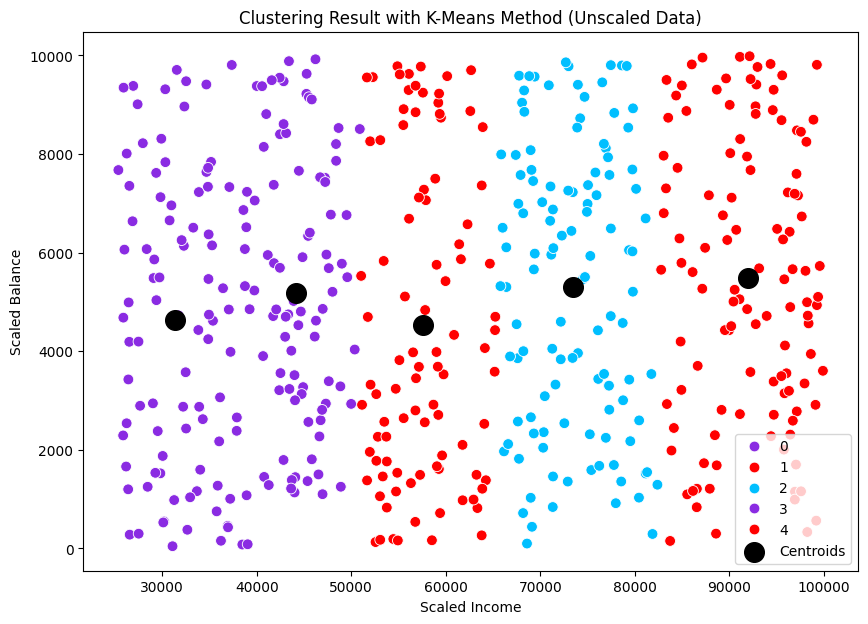

In [88]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Balance", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Balance")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()
plt.show()

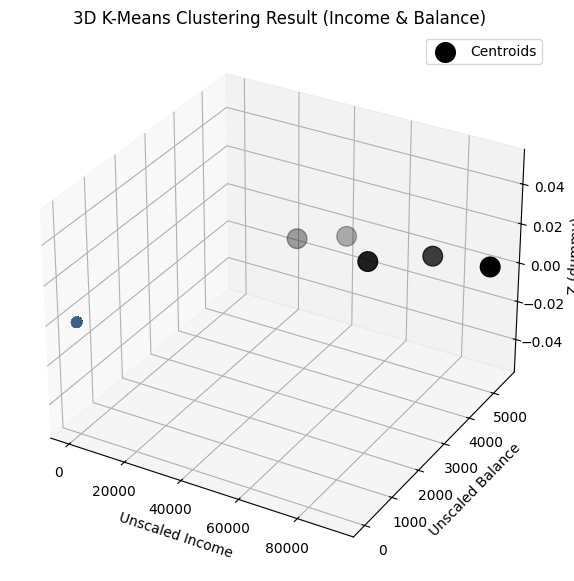

In [89]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Buat sumbu Z dummy biar 3D bisa divisualisasikan
z_dummy = np.zeros(len(df))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points (Income, Balance)
ax.scatter(
    df_sc_scaled['Income'],
    df_sc_scaled['Balance'],
    z_dummy,
    c=clusters,
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Plot centroids (Z=0 juga)
ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    np.zeros(kmeans.cluster_centers_.shape[0]),
    c='black',
    s=200,
    label='Centroids'
)

ax.set_xlabel('Unscaled Income')
ax.set_ylabel('Unscaled Balance')
ax.set_zlabel('Z (dummy)')
ax.set_title('3D K-Means Clustering Result (Income & Balance)')
ax.legend()
plt.show()


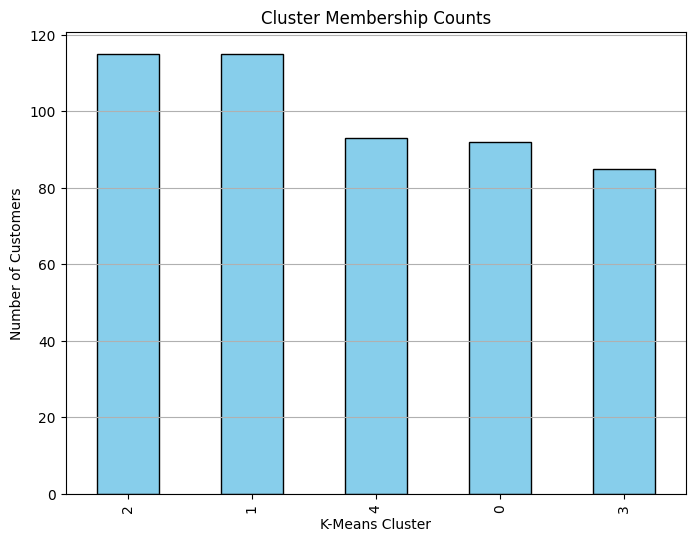

In [90]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


○ Which version (scaled or unscaled) produces clearer cluster separation?

Versi scaled menghasilkan pemisahan cluster yang lebih jelas dan seimbang. Pada data scaled, setiap variabel seperti Income dan Balance memiliki skala yang sama sehingga tidak ada variabel yang mendominasi proses pembentukan cluster. Akibatnya, hasil clustering menjadi lebih proporsional dan pola kelompok pelanggan dapat terlihat dengan lebih jelas serta terpisah antar cluster.

○ Why does scaling affect the clustering result?

Scaling memengaruhi hasil clustering karena algoritma K-Means sangat sensitif terhadap perbedaan skala antar variabel. Algoritma ini menggunakan jarak Euclidean untuk mengukur kedekatan antar data. Jika satu fitur memiliki nilai jauh lebih besar (misalnya Income dalam puluhan ribu dibanding Balance dalam ribuan), maka fitur tersebut akan lebih berpengaruh dalam penentuan cluster. Dengan melakukan scaling, semua variabel berada pada rentang nilai yang seimbang, sehingga setiap fitur berkontribusi secara adil terhadap pembentukan cluster.

In [91]:
# reload the full dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df_full = pd.read_csv(url)

# Add the cluster labels from your current df (based on income & spending)
df_full['KMeans_Cluster'] = df['KMeans_Cluster']

# Now df_full has all columns (Gender, Age, etc.) + the cluster label
df_full.head()

# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_full.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Income': ['mean', 'median', 'min', 'max'],
    'Balance': ['mean', 'median', 'min', 'max'],
    'Credit_Score': ['mean', 'median', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'median', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'median', 'min', 'max'],
    'Online_Activity': ['mean', 'median', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'median', 'min', 'max'],
    'Education': lambda x: x.mode()[0]
})
cluster_summary

Age                       Income               \
                     mean median min max          mean       median   
KMeans_Cluster                                                        
0               41.869565   43.0  18  63  44103.100531  44021.24669   
1               40.295652   40.0  18  64  92036.948091  92257.08687   
2               39.721739   40.0  18  64  73508.397090  73417.76833   
3               39.529412   37.0  18  64  31371.476889  31256.68266   
4               38.612903   38.0  18  63  57641.248114  57280.18296   

                                              Balance               ...  \
                        min          max         mean       median  ...   
KMeans_Cluster                                                      ...   
0               37872.22579  50901.37605  5176.555887  4939.483751  ...   
1               82793.55614  99913.52549  5476.128980  5459.453059  ...   
2               65785.44626  82399.39404  5308.245664  5660.026199  ...   
3               25352.16071  37352.06174  4633.049062  4727.631128  ...   
4               51042.51384  65243.44083  4528.572036  3687.608472  ...   

               Purchase_Frequency Online_Activity                      \
                              max            mean    median       min   
KMeans_Cluster                                                          
0                        0.988192        0.501847  0.496874  0.001432   
1                        0.993942        0.449520  0.385501  0.001320   
2                        0.982277        0.492108  0.461863  0.002706   
3                        0.965071        0.538652  0.542276  0.034342   
4                        0.991562        0.505545  0.480849  0.001991   

                         Customer_Satisfaction                   Education  
                     max                  mean median min max     <lambda>  
KMeans_Cluster                                                              
0               0.979954              2.391304    2.0   1   4  High School  
1               0.996199              2.582609    3.0   1   4  High School  
2               0.994756              2.608696    3.0   1   4  High School  
3               0.999897              2.611765    3.0   1   4       Master  
4               0.999120              2.612903    3.0   1   4     Bachelor  

[5 rows x 33 columns]

# Managerial Implications Based on the Five Clusters
Cluster 0 – Moderate-Income, Moderate-Balance Consumers

Profile:

Usia rata-rata 42 tahun.

Pendapatan sekitar 44 ribu, tergolong menengah.

Saldo bank juga menengah (~5.176).

Aktivitas online cukup tinggi (~0.98).

Pendidikan paling umum: High School.

Implications:
Pelanggan dalam cluster ini memiliki kestabilan finansial sedang dan cukup aktif secara digital. Mereka cenderung realistis dan berhati-hati dalam mengatur keuangan. Strategi pemasaran yang cocok adalah promosi value-based seperti bundle deals atau potongan harga untuk pembelian rutin.

Cluster 1 – High-Income, High-Balance Customers

Profile:

Usia rata-rata 40 tahun.

Pendapatan tertinggi, sekitar 92 ribu.

Saldo tinggi (~5.476).

Aktivitas online sangat tinggi (~0.99).

Pendidikan dominan: High School.

Implications:
Kelompok ini merupakan pelanggan dengan daya beli kuat dan stabilitas finansial tinggi. Mereka cocok dijadikan target untuk produk atau layanan premium, investasi, dan exclusive membership. Strategi promosi yang tepat adalah program loyalitas berbasis penghargaan dan layanan personal.

Cluster 2 – Upper-Middle Income, Good Balance Users

Profile:

Usia rata-rata 40 tahun.

Pendapatan atas-menengah, sekitar 73 ribu.

Saldo bank cukup tinggi (~5.308).

Aktivitas online aktif (~0.98).

Pendidikan: High School.

Implications:
Pelanggan ini berpotensi besar menjadi konsumen setia karena stabil secara ekonomi dan aktif secara digital. Pendekatan berbasis digital engagement seperti email marketing atau promo eksklusif lewat aplikasi akan efektif untuk meningkatkan retensi dan pembelian berulang.

Cluster 3 – Low-Income, Low-Balance Consumers

Profile:

Usia rata-rata 39 tahun.

Pendapatan terendah, sekitar 31 ribu.

Saldo juga paling rendah (~4.633).

Aktivitas online sedikit lebih rendah dibanding cluster lain (~0.96).

Pendidikan paling umum: Master’s degree (menarik—berpendidikan tinggi tapi berpendapatan rendah).

Implications:
Meskipun memiliki tingkat pendidikan tinggi, kelompok ini menunjukkan keterbatasan finansial. Mereka cenderung sensitif terhadap harga dan lebih berhati-hati dalam pengeluaran. Strategi yang cocok adalah promosi produk ekonomis, potongan harga, atau program loyalitas yang memberi manfaat langsung.

Cluster 4 – Middle-Income, Lower-Balance Consumers

Profile:

Usia rata-rata 39 tahun.

Pendapatan menengah, sekitar 57 ribu.

Saldo lebih rendah (~4.528) dibanding cluster dengan pendapatan serupa.

Aktivitas online sangat tinggi (~0.99).

Pendidikan dominan: Bachelor’s degree.

Implications:
Kelompok ini memiliki penghasilan yang cukup namun cenderung memiliki pengeluaran besar sehingga saldo rendah. Mereka aktif secara digital, jadi cocok untuk pendekatan berbasis media sosial dan kampanye interaktif. Program cashback atau reward digital bisa meningkatkan loyalitas mereka.

# Which segment to prioritize for growth or retention

Berdasarkan hasil segmentasi, segmen yang sebaiknya diprioritaskan untuk pertumbuhan dan retensi adalah Cluster 1 – High-Income Big Spenders. Kelompok ini memiliki pendapatan tinggi dan kecenderungan pengeluaran yang besar, sehingga berpotensi memberikan kontribusi pendapatan terbesar bagi perusahaan. Fokus pada retensi segmen ini penting karena mereka merupakan pelanggan bernilai tinggi yang dapat menjadi sumber keuntungan jangka panjang. Strategi yang disarankan meliputi peningkatan pengalaman pelanggan melalui layanan premium, penawaran eksklusif, serta program loyalitas yang dipersonalisasi. Selain itu, menjaga kepuasan dan keterlibatan mereka dapat membantu menciptakan efek word-of-mouth positif yang mendorong pertumbuhan pelanggan baru dengan karakteristik serupa.